In [2]:
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cftime

## Replicating Frierson with Frierson Test Case

In [3]:
base_dir = '/home/links/sr850/isca_data/'
# Data from Frierson Test Case
exp_name = 'frierson_test_case_rh7_tau1'
frierson_rh7_t1_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
frierson_rh7_t1 = xr.open_mfdataset(frierson_rh7_t1_files, use_cftime=True)

exp_name = 'frierson_test_case_rh7_tau2_new'
frierson_rh7_t2_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,61)]
frierson_rh7_t2 = xr.open_mfdataset(frierson_rh7_t2_files, use_cftime=True)

exp_name = 'frierson_test_case_rh7_tau4'
frierson_rh7_t4_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
frierson_rh7_t4 = xr.open_mfdataset(frierson_rh7_t4_files, use_cftime=True)

exp_name = 'frierson_test_case_rh7_tau8'
frierson_rh7_t8_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
frierson_rh7_t8 = xr.open_mfdataset(frierson_rh7_t8_files, use_cftime=True)

exp_name = 'frierson_test_case_rh5_tau2'
frierson_rh5_t2_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
frierson_rh5_t2 = xr.open_mfdataset(frierson_rh5_t2_files, use_cftime=True)

exp_name = 'frierson_test_case_rh6_tau2'
frierson_rh6_t2_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
frierson_rh6_t2 = xr.open_mfdataset(frierson_rh6_t2_files, use_cftime=True)

exp_name = 'frierson_test_case_rh8_tau2'
frierson_rh8_t2_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
frierson_rh8_t2 = xr.open_mfdataset(frierson_rh8_t2_files, use_cftime=True)

## Isca VS Frierson

In [4]:
base_dir = '/home/links/sr850/isca_data/'
# Data from Isca vs Frierson
exp_name = 'isca_vs_frierson_rh7_tau1'
isca_vs_frierson_rh7_t1_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
isca_vs_frierson_rh7_t1 = xr.open_mfdataset(isca_vs_frierson_rh7_t1_files, use_cftime=True)

exp_name = 'isca_vs_frierson_rh7_tau2'
isca_vs_frierson_rh7_t2_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
isca_vs_frierson_rh7_t2 = xr.open_mfdataset(isca_vs_frierson_rh7_t2_files, use_cftime=True)

exp_name = 'isca_vs_frierson_rh7_tau4'
isca_vs_frierson_rh7_t4_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
isca_vs_frierson_rh7_t4 = xr.open_mfdataset(isca_vs_frierson_rh7_t4_files, use_cftime=True)

exp_name = 'isca_vs_frierson_rh7_tau8'
isca_vs_frierson_rh7_t8_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
isca_vs_frierson_rh7_t8 = xr.open_mfdataset(isca_vs_frierson_rh7_t8_files, use_cftime=True)

exp_name = 'isca_vs_frierson_rh5_tau2'
isca_vs_frierson_rh5_t2_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
isca_vs_frierson_rh5_t2 = xr.open_mfdataset(isca_vs_frierson_rh5_t2_files, use_cftime=True)

exp_name = 'isca_vs_frierson_rh6_tau2'
isca_vs_frierson_rh6_t2_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
isca_vs_frierson_rh6_t2 = xr.open_mfdataset(isca_vs_frierson_rh6_t2_files, use_cftime=True)

exp_name = 'isca_vs_frierson_rh8_tau2'
isca_vs_frierson_rh8_t2_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,121)]
isca_vs_frierson_rh8_t2 = xr.open_mfdataset(isca_vs_frierson_rh8_t2_files, use_cftime=True)

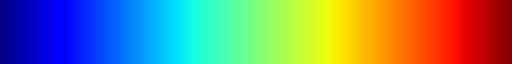

In [34]:
jet_cmap = plt.colormaps.get_cmap("jet") 
jet_cmap.set_under("midnightblue") 
jet_cmap

In [6]:
def zonal_mean_rh_plot_for_grid(ds, ax, exp = '', zoom = 0, levels = 100, negative= False , cmap1=jet_cmap, rh_cmap_label= 'Relative Humidity (%)', negative_levels = np.arange(-100, 0.01, 2), label_contours=True, contour_levels = [50, 60, 70, 80, 90, 100], colorbar=False, seasonal_avg=False, Season = '', sub_label_season=True):
    '''Zoom default is 0, then the latitude ranges from -90 to +90, 
    but if zoom is nonzero, the x axis range is +- the value of zoom (e.g. zoom =25) degrees'''
    '''The way it returns cf means it stores the values to make the colorbar when you plot several in a grid'''
    '''Default is to plot yearly average but if seasonal_avg is true then this plots a seasonal average for the selected Season'''
    if seasonal_avg:
        mean = ds.groupby('time.season').mean(dim = ['time','lon']).sel(season=Season).rh # seasonal average over specified season
    else:
        mean = ds.rh.mean(dim = ['time','lon']) # Yearly averaged

    if negative:
        EXTEND = 'neither'
    else:
        EXTEND = 'min'
        
    cf = ax.contourf(mean.lat, mean.pfull, mean.values, extend=EXTEND, cmap=cmap1, levels=levels, zorder=10)
        
    if label_contours:
        contours = ax.contour(mean.lat, mean.pfull, mean.values, contour_levels, extend='neither', zorder=20, colors='black')
        labels = ax.clabel(contours, inline= True, colors='black',fontsize=10.5, zorder=12)
           
    if negative:
        nf = mean.plot.contourf(ax=ax, extend='min', cmap = 'RdPu', levels = negative_levels, cbar_kwargs = {'shrink':0.8, 'label':''})
    
    if zoom != 0:
        ax.set_xlim(-zoom, zoom)
        
    ax.invert_yaxis()
    ax.set_xlabel('Latitude ($^\circ$N)', fontsize =13)
    ax.set_ylabel('Pressure (hPa)', fontsize =13)
    if sub_label_season:
        ax.set_title(f'{exp} {Season}', fontsize =14)
    else:
        ax.set_title(f'{exp}', fontsize = 14)
    return cf

<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_77841/286709676.py:29: SyntaxWarning: invalid escape sequence '\c'
  ax.set_xlabel('Latitude ($^\circ$N)', fontsize =13)


In [7]:
def colorbar(c, colorbar_label = '', colorbar_ticks = None):
    '''Add a colorbar as a subplot, where c is the contour set you want the colorbar to reflect'''

    # Adjust the location of the subplots on the page to make room for the colorbar
    fig.subplots_adjust(bottom=0.1, top=0.95, left=0.001, right=0.99, wspace=0.1, hspace=0.5)

    # Add a colorbar axis at the bottom of the graph
    cbar_ax = fig.add_axes([1, 0.2, 0.02, 0.6])  # left, bottom, width, height

    # Draw the colorbar
    cbar=fig.colorbar(contours, ticks=colorbar_ticks, cax=cbar_ax)
    cbar.set_label(colorbar_label ,fontsize=13)
    return cbar

I'm going to filter all of these to be YR2-YR5 only because that's what Frierson used (even though I have 10 years of data, but I guess to be as similar as possible I'll just discard the rest

In [8]:
frierson_rh7_t1 = frierson_rh7_t1.sel(time=slice('0002','0005'))
frierson_rh7_t2 = frierson_rh7_t2.sel(time=slice('0002','0005'))
frierson_rh7_t4 = frierson_rh7_t4.sel(time=slice('0002','0005'))
frierson_rh7_t8 = frierson_rh7_t8.sel(time=slice('0002','0005'))
frierson_rh5_t2 = frierson_rh5_t2.sel(time=slice('0002','0005'))
frierson_rh6_t2 = frierson_rh6_t2.sel(time=slice('0002','0005'))
frierson_rh7_t2 = frierson_rh7_t2.sel(time=slice('0002','0005'))
frierson_rh8_t2 = frierson_rh8_t2.sel(time=slice('0002','0005'))
isca_vs_frierson_rh7_t1 = isca_vs_frierson_rh7_t1.sel(time=slice('0002','0005'))
isca_vs_frierson_rh7_t2 = isca_vs_frierson_rh7_t2.sel(time=slice('0002','0005'))
isca_vs_frierson_rh7_t4 = isca_vs_frierson_rh7_t4.sel(time=slice('0002','0005'))
isca_vs_frierson_rh7_t8 = isca_vs_frierson_rh7_t8.sel(time=slice('0002','0005'))
isca_vs_frierson_rh5_t2 = isca_vs_frierson_rh5_t2.sel(time=slice('0002','0005'))
isca_vs_frierson_rh6_t2 = isca_vs_frierson_rh6_t2.sel(time=slice('0002','0005'))
isca_vs_frierson_rh7_t2 = isca_vs_frierson_rh7_t2.sel(time=slice('0002','0005'))
isca_vs_frierson_rh8_t2 = isca_vs_frierson_rh8_t2.sel(time=slice('0002','0005'))

Firstly, creating RH plots to replicate Frierson Test Case:

/tmp/ipykernel_241958/1426653399.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


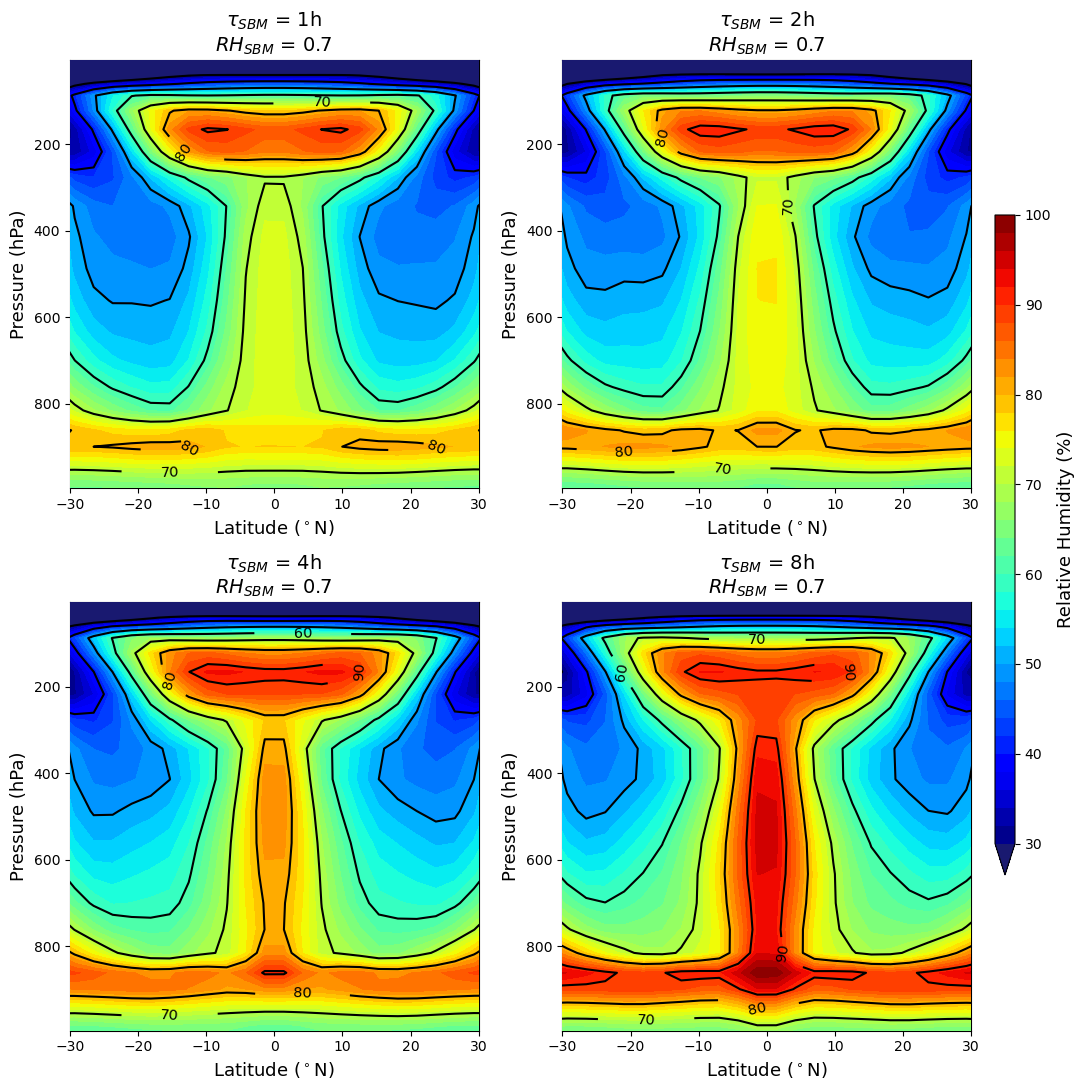

In [37]:
fig, axs = plt.subplots(ncols= 2, nrows = 2, figsize=(10, 11))

min = 30
L = np.arange(min, 101, 2) # filled contour levels
lines = [30, 40, 50, 60, 70, 80, 90] # contour line levels
Z = 30 # zoom
 
contours = zonal_mean_rh_plot_for_grid(frierson_rh7_t1,ax = axs[0,0], exp = r'$\tau_{SBM}$ = 1h' +'\n' + r'$RH_{SBM}$ = 0.7' , levels = L, zoom=Z, contour_levels = lines);
zonal_mean_rh_plot_for_grid(frierson_rh7_t2,ax = axs[0,1], exp = r'$\tau_{SBM}$ = 2h' +'\n' + r'$RH_{SBM}$ = 0.7', levels = L, zoom=Z, contour_levels = lines);
zonal_mean_rh_plot_for_grid(frierson_rh7_t4,ax = axs[1,0], exp = r'$\tau_{SBM}$ = 4h' +'\n' + r'$RH_{SBM}$ = 0.7', levels = L, zoom=Z, contour_levels = lines);
zonal_mean_rh_plot_for_grid(frierson_rh7_t8,ax = axs[1, 1], exp = r'$\tau_{SBM}$ = 8h' +'\n' + r'$RH_{SBM}$ = 0.7', levels = L, zoom=Z, contour_levels = lines);

# plt.suptitle('Frierson Test Case:\nZonally Averaged Relative Humidity Distribution', fontsize=20)

colorbar(contours, 'Relative Humidity (%)', colorbar_ticks = np.arange(min, 101, 10))
fig.tight_layout()
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/FTC_zonalrh__tausbm.png', bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_241958/3358387107.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


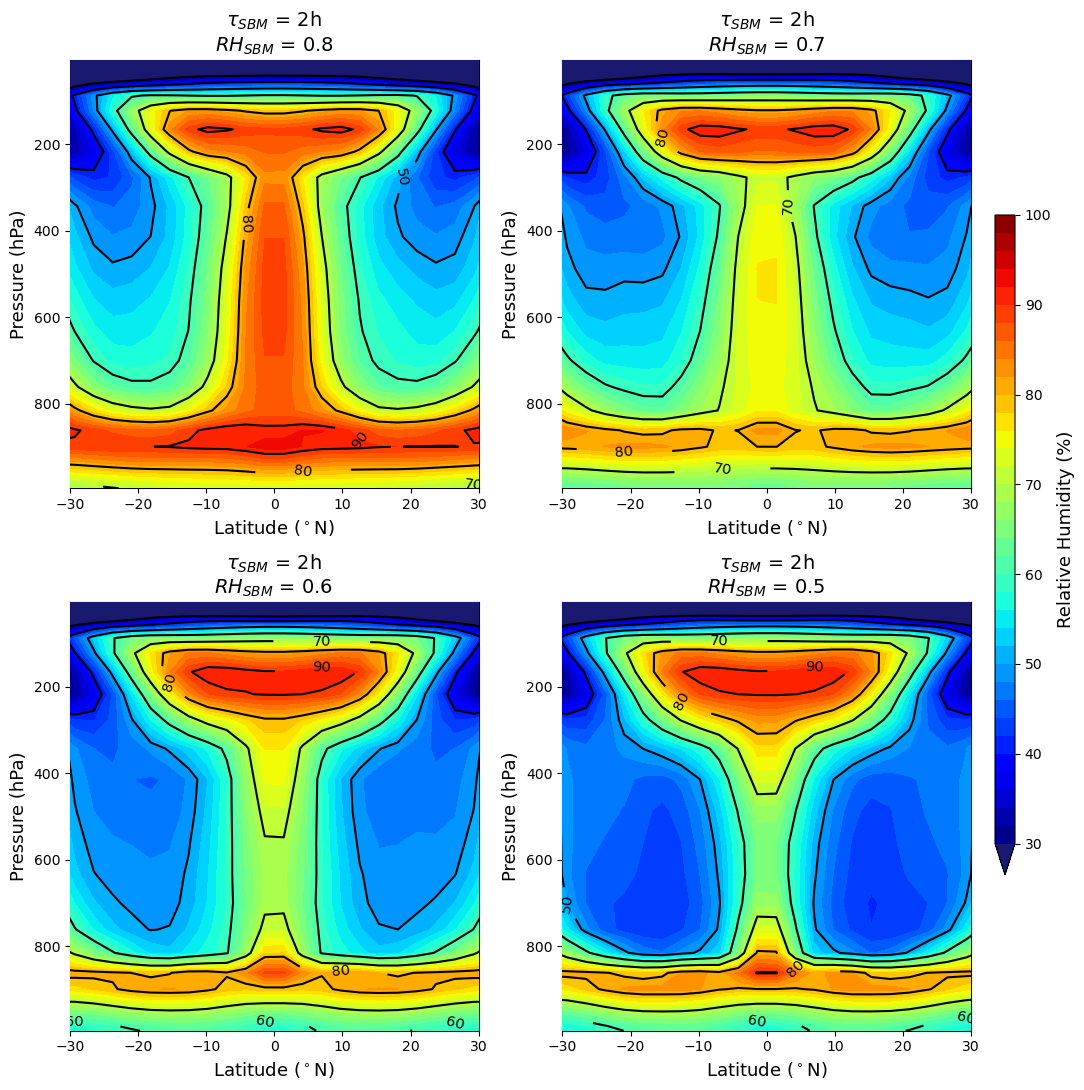

In [39]:
fig, axs = plt.subplots(ncols= 2, nrows = 2, figsize=(10, 11))

min = 30
L = np.arange(min, 101, 2) # filled contour levels
lines = [30, 40, 50, 60, 70, 80, 90] # contour line levels
Z = 30 # zoom
 
contours = zonal_mean_rh_plot_for_grid(frierson_rh8_t2,ax = axs[0,0], exp = r'$\tau_{SBM}$ = 2h' +'\n' + r'$RH_{SBM}$ = 0.8', levels = L, zoom=Z, contour_levels = lines);
zonal_mean_rh_plot_for_grid(frierson_rh7_t2,ax = axs[0,1], exp = r'$\tau_{SBM}$ = 2h' +'\n' + r'$RH_{SBM}$ = 0.7', levels = L, zoom=Z, contour_levels = lines);
zonal_mean_rh_plot_for_grid(frierson_rh6_t2,ax = axs[1,0], exp = r'$\tau_{SBM}$ = 2h' +'\n' + r'$RH_{SBM}$ = 0.6', levels = L, zoom=Z, contour_levels = lines);
zonal_mean_rh_plot_for_grid(frierson_rh5_t2,ax = axs[1, 1], exp = r'$\tau_{SBM}$ = 2h' +'\n' + r'$RH_{SBM}$ = 0.5', levels = L, zoom=Z, contour_levels = lines);

#plt.suptitle('Frierson Test Case:\nZonally Averaged Relative Humidity Distribution', fontsize=20)

colorbar(contours, 'Relative Humidity (%)', colorbar_ticks = np.arange(min, 101, 10))
fig.tight_layout()
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/FTC_zonalrh_rhsbm.png', bbox_inches='tight', pad_inches=0.1)

Technically I can also make zoomed out versions of those but idk if that's especially relevant if the goal is to compare them to Frierson

Precipitation Plots:

In [43]:
plt.rcParams['font.size'] = 12          # Default text size
plt.rcParams['axes.titlesize'] = 16     # Title font size
plt.rcParams['axes.labelsize'] = 13     # X and Y axis labels font size
plt.rcParams['xtick.labelsize'] = 12    # X tick labels font size
plt.rcParams['ytick.labelsize'] = 12    # Y tick labels font size
plt.rcParams['legend.fontsize'] = 13    # Legend font size
plt.rcParams['figure.titlesize'] = 18   # Figure title font size

In [40]:
def precipitation_plot(data, labels, zoom = 0, exp = '', colours = None, styles = None, seasonal_avg=False, Season = '', ymin = 0, ymax = 500):
    for i in range(len(data)):
        ds = data[i]
        colour = colours[i]
        style = styles[i]
        if seasonal_avg:
            mean = ds.groupby('time.season').mean(dim = ['time','lon']).sel(season=Season).precipitation # seasonal average over specified season
            fig = (mean*2.26e6).plot(linestyle = style, color = colour, label = labels[i])
        else:
            fig = (ds.precipitation.mean(dim=['time', 'lon'])*2.26e6).plot(linestyle = style ,color = colour, label = labels[i])
            
        plt.legend()
        if zoom != 0:
            plt.xlim(-zoom, zoom)
        plt.ylim(ymin, ymax)
    plt.xlabel('Latitude ($^\circ$N)')
    plt.ylabel('Precipitation (W/$m^2$)')
    #plt.title(f'{exp}' +'\n Zonal Mean Precipitation')
    return fig

<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_241958/1662860690.py:16: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('Latitude ($^\circ$N)')


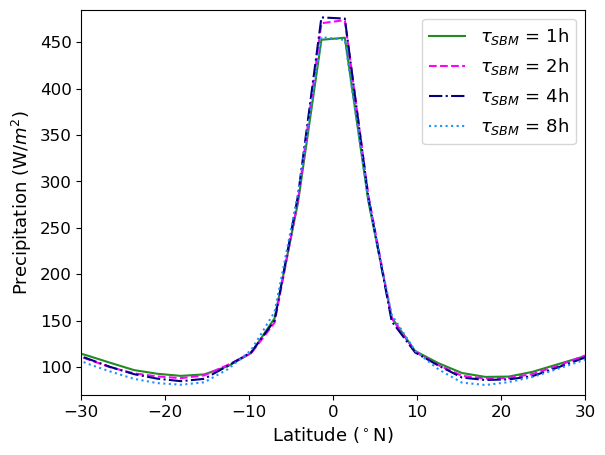

In [44]:
plt.figure(figsize = (6.5, 5))
precipitation_plot( [frierson_rh7_t1, frierson_rh7_t2, frierson_rh7_t4, frierson_rh7_t8], [r'$\tau_{SBM}$ = 1h', r'$\tau_{SBM}$ = 2h', r'$\tau_{SBM}$ = 4h', r'$\tau_{SBM}$ = 8h'], zoom = 30, exp = r'Frierson Test Case ($RH_{SBM}$ = 0.7):', styles = ['-', '--', '-.', ':'], colours = ['forestgreen', 'magenta', 'navy', 'dodgerblue'], ymin = 70, ymax = 485)
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/FTC_zonalprecip__tausbm.png')

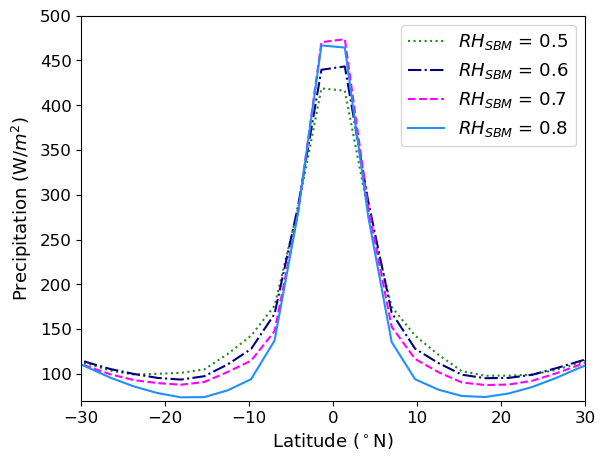

In [45]:
plt.figure(figsize = (6.5, 5))
precipitation_plot( [frierson_rh5_t2, frierson_rh6_t2, frierson_rh7_t2, frierson_rh8_t2], [r'$RH_{SBM}$ = 0.5', r'$RH_{SBM}$ = 0.6', r'$RH_{SBM}$ = 0.7', r'$RH_{SBM}$ = 0.8' ], zoom = 30, exp = r'Frierson Test Case ($\tau_{SBM}$ = 2h):', styles = [':', '-.', '--', '-'], colours = ['forestgreen', 'navy',  'magenta', 'dodgerblue'], ymin = 70)
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/FTC_zonalprecip__rhsbm.png')

Printing the precipitation values at the peak /ITCZ/ equator for each set of convection params

In [17]:
def precipitation_at_equator(ds):
    max_precip =  (ds.precipitation.mean(dim = ['time', 'lon'])*2.26e6).sel(lat=0, method = 'nearest').values
    return max_precip

In [18]:
exps = ['rh5_t2', 'rh6_t2', 'rh7_t2', 'rh8_t2', 'rh7_t1', 'rh7_t2', 'rh7_t4', 'rh7_t8']
datasets = [globals()[f'frierson_{e}'] for e in exps]
for i in range(len(datasets)):
    ds = datasets[i]
    exp = exps[i]

    print(f'precip_at_equator {exp} = ', precipitation_at_equator(ds))

precip_at_equator rh5_t2 =  416.3314
precip_at_equator rh6_t2 =  443.34235
precip_at_equator rh7_t2 =  473.81186
precip_at_equator rh8_t2 =  464.44418
precip_at_equator rh7_t1 =  454.8135
precip_at_equator rh7_t2 =  473.81186
precip_at_equator rh7_t4 =  475.44604
precip_at_equator rh7_t8 =  452.4345


In [19]:
def max_precip(ds):
    max_precip =  (ds.precipitation.mean(dim = ['time', 'lon'])*2.26e6).values.max()
    return max_precip

In [20]:
exps = ['rh5_t2', 'rh6_t2', 'rh7_t2', 'rh8_t2', 'rh7_t1', 'rh7_t2', 'rh7_t4', 'rh7_t8']
datasets = [globals()[f'frierson_{e}'] for e in exps]
for i in range(len(datasets)):
    ds = datasets[i]
    exp = exps[i]

    print(f'precip_max {exp} = ', max_precip(ds))

precip_max rh5_t2 =  418.7791
precip_max rh6_t2 =  443.34235
precip_max rh7_t2 =  473.81186
precip_max rh8_t2 =  466.8342
precip_max rh7_t1 =  454.8135
precip_max rh7_t2 =  473.81186
precip_max rh7_t4 =  476.71497
precip_max rh7_t8 =  455.46698


In [1]:
a = [1, 2, 3]

In [21]:
ds = frierson_rh5_t2

In [25]:
(ds.mean(dim = ['time', 'lon']).precipitation*2.26e6).values.sum()

6306.4785

In [26]:
np.sum((ds.mean(dim = ['time', 'lon']).precipitation*2.26e6).values)

6306.4785

This is me jumping ahead to repeat the plots I made for the effects of changing sbm parameters in the earth like isca experiments but for total precip rather than max precip

In [27]:
def cumulative_mean_precip(ds, seasonal_avg = False, latmin = -30, latmax = 30, Season = None):
    
    ds = ds.sel(lat = slice(latmin, latmax)) # limit to latmin degrees south of equator, latmax degrees north (default tropics)
    if seasonal_avg:
        seasonal = ds.groupby('time.season').mean(dim = ['time','lon']).sel(season=Season).precipitation
        total_precip = (seasonal*2.26e6).values.sum()
    else:
        total_precip = (ds.mean(dim = ['time', 'lon']).precipitation*2.26e6).values.sum()
    
    return total_precip

In [52]:
def precipitation_max(ds, seasonal_avg = False, latmin = -30, latmax = 30, Season = None):
    
    ds = ds.sel(lat = slice(latmin, latmax)) # limit to latmin degrees south of equator, latmax degrees north (default tropics)
    if seasonal_avg:
        seasonal = ds.groupby('time.season').mean(dim = ['time','lon']).sel(season=Season).precipitation
        max_precip_tropics = (seasonal*2.26e6).values.max()
    else:
        max_precip_tropics = (ds.mean(dim = ['time', 'lon']).precipitation*2.26e6).values.max()
    
    return max_precip_tropics

rh_sbm = np.arange(0.5, 0.81, 0.1)
max_annual_precip = []
#max_annual_precip_NH = []
#max_annual_precip_SH = []

max_annual_precip_DJF = []
max_annual_precip_MAM = []
max_annual_precip_JJA = []
max_annual_precip_SON = []

exps = ['rh5_t2', 'rh6_t2', 'rh7_t2', 'rh8_t2']
datasets = [globals()[f'isca_vs_frierson_{e}'] for e in exps]


for i in range(len(datasets)):
    ds = datasets[i]
    max_annual_precip.append(precipitation_max(ds, seasonal_avg = False, latmin = -30, latmax = 30, Season = None))
    #max_annual_precip_NH.append(precipitation_max(ds, seasonal_avg = False, latmin = 0, latmax = 30, Season = None))
    #max_annual_precip_SH.append(precipitation_max(ds, seasonal_avg = False, latmin = -30, latmax = 0, Season = None))
    max_annual_precip_DJF.append(precipitation_max(ds, seasonal_avg = True, latmin = -30, latmax = 30, Season = 'DJF'))
    max_annual_precip_MAM.append(precipitation_max(ds, seasonal_avg = True, latmin = -30, latmax = 30, Season = 'MAM'))
    max_annual_precip_JJA.append(precipitation_max(ds, seasonal_avg = True, latmin = -30, latmax = 30, Season = 'JJA'))
    max_annual_precip_SON.append(precipitation_max(ds, seasonal_avg = True, latmin = -30, latmax = 30, Season = 'SON'))

    
plt.scatter(rh_sbm, max_annual_precip, label = 'Maximum Precipitation Tropics')

plt.scatter(rh_sbm, max_annual_precip_DJF, label = 'Maximum Precipitation Tropics DJF')
plt.scatter(rh_sbm, max_annual_precip_MAM, label = 'Maximum Precipitation Tropics MAM')
plt.scatter(rh_sbm, max_annual_precip_JJA, label = 'Maximum Precipitation Tropics JJA')
plt.scatter(rh_sbm, max_annual_precip_SON, label = 'Maximum Precipitation Tropics SON')

#plt.scatter(rh_sbm, max_annual_precip_NH, label = 'Maximum Precipitation NH')
#plt.scatter(rh_sbm, max_annual_precip_SH, label = 'Maximum Precipitation SH')

plt.ylabel('Precipitation (W/$m^2$)')
plt.xlabel('$RH_{SBM}$')
plt.xticks(rh_sbm)
plt.legend(bbox_to_anchor=(1, 1))

## Back to Frierson Test Case - I'm not saving these figures bc I don't think I plan to use them...?  
And if you do use them CHANGE THE COLOURS

In [279]:
def plotting_rhsbm_vs_maxprecip_frierson(ax, lmin = -30, lmax = 30):
    rh_sbm = np.arange(0.5, 0.81, 0.1)
    max_precip = []

    max_precip_DJF = []
    max_precip_MAM = []
    max_precip_JJA = []
    max_precip_SON = []

    exps = ['rh5_t2', 'rh6_t2', 'rh7_t2', 'rh8_t2']
    datasets = [globals()[f'frierson_{e}'] for e in exps]


    for i in range(len(datasets)):
        ds = datasets[i]
        max_precip.append(precipitation_max(ds, seasonal_avg = False, latmin = lmin, latmax = lmax, Season = None))
        max_precip_DJF.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'DJF'))
        max_precip_MAM.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'MAM'))
        max_precip_JJA.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'JJA'))
        max_precip_SON.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'SON'))

    
    ax.plot(rh_sbm, max_precip, label = 'Annual', marker = 'o')
    ax.plot(rh_sbm, max_precip_DJF, label = 'DJF', marker = 'o')
    ax.plot(rh_sbm, max_precip_MAM, label = 'MAM', marker = 'o')
    ax.plot(rh_sbm, max_precip_JJA, label = 'JJA', marker = 'o')
    ax.plot(rh_sbm, max_precip_SON, label = 'SON', marker = 'o')

    ax.set_ylabel('Maximum Mean Precipitation (W/$m^2$)')
    ax.set_xlabel('$RH_{SBM}$')
    ax.set_xticks(rh_sbm)
    #ax.set_ylim(50, 160)
    return fig

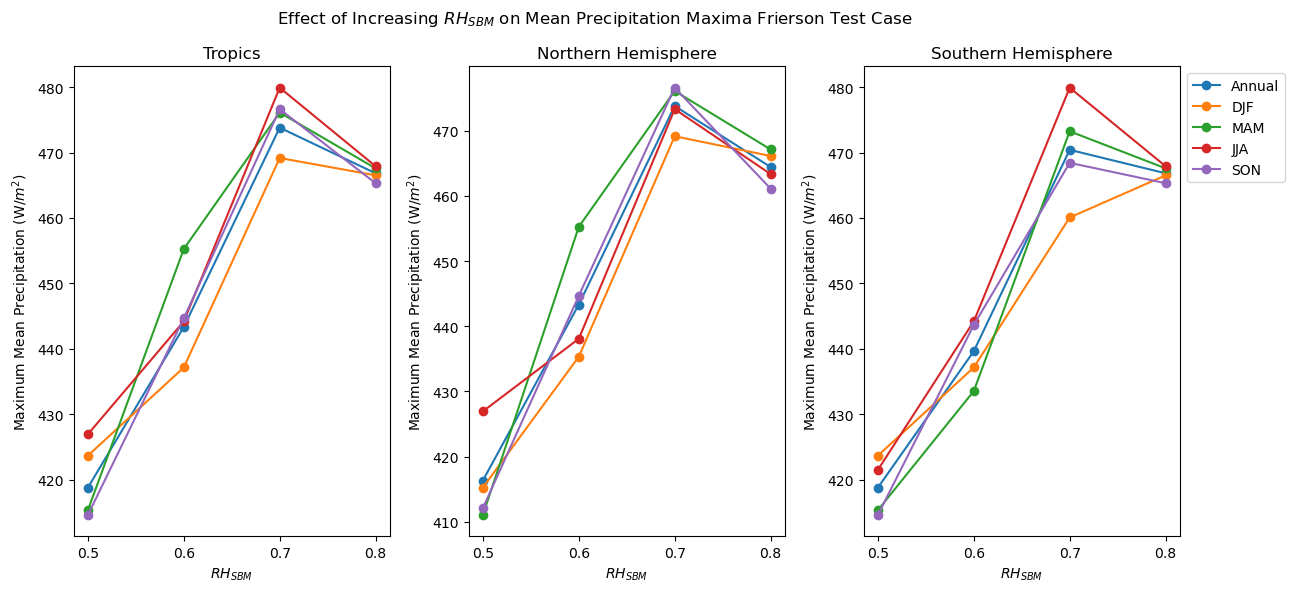

In [280]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
plotting_rhsbm_vs_maxprecip_frierson(ax = ax[0], lmin = -30, lmax = 30) # max across tropics
ax[0].set_title('Tropics')
plotting_rhsbm_vs_maxprecip_frierson(ax = ax[1], lmin = 0, lmax = 30) # NH Max
ax[1].set_title('Northern Hemisphere')
plotting_rhsbm_vs_maxprecip_frierson(ax = ax[2], lmin = -30, lmax = 0) # SH Max
ax[2].set_title('Southern Hemisphere')
plt.suptitle('Effect of Increasing $RH_{SBM}$ on Mean Precipitation Maxima Frierson Test Case')
fig.tight_layout()
plt.legend(bbox_to_anchor = (1, 1))


In [282]:
def plotting_tausbm_vs_maxprecip_frierson(ax, lmin = -30, lmax = 30):
    tau_sbm = ['1', '2', '4', '8']
    max_precip = []

    max_precip_DJF = []
    max_precip_MAM = []
    max_precip_JJA = []
    max_precip_SON = []

    exps = ['rh7_t1', 'rh7_t2', 'rh7_t4', 'rh7_t8']
    datasets = [globals()[f'frierson_{e}'] for e in exps]


    for i in range(len(datasets)):
        ds = datasets[i]
        max_precip.append(precipitation_max(ds, seasonal_avg = False, latmin = lmin, latmax = lmax, Season = None))
        max_precip_DJF.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'DJF'))
        max_precip_MAM.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'MAM'))
        max_precip_JJA.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'JJA'))
        max_precip_SON.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'SON'))

    
    ax.plot(tau_sbm, max_precip, label = 'Annual', marker = 'o')
    ax.plot(tau_sbm, max_precip_DJF, label = 'DJF', marker = 'o')
    ax.plot(tau_sbm, max_precip_MAM, label = 'MAM', marker = 'o')
    ax.plot(tau_sbm, max_precip_JJA, label = 'JJA', marker = 'o')
    ax.plot(tau_sbm, max_precip_SON, label = 'SON', marker = 'o')

    ax.set_ylabel('Maximum Mean Precipitation (W/$m^2$)')
    ax.set_xlabel(r'$\tau_{SBM}$ (h)')
    ax.set_xticks(tau_sbm)
    #ax.set_ylim(50, 160)
    return fig

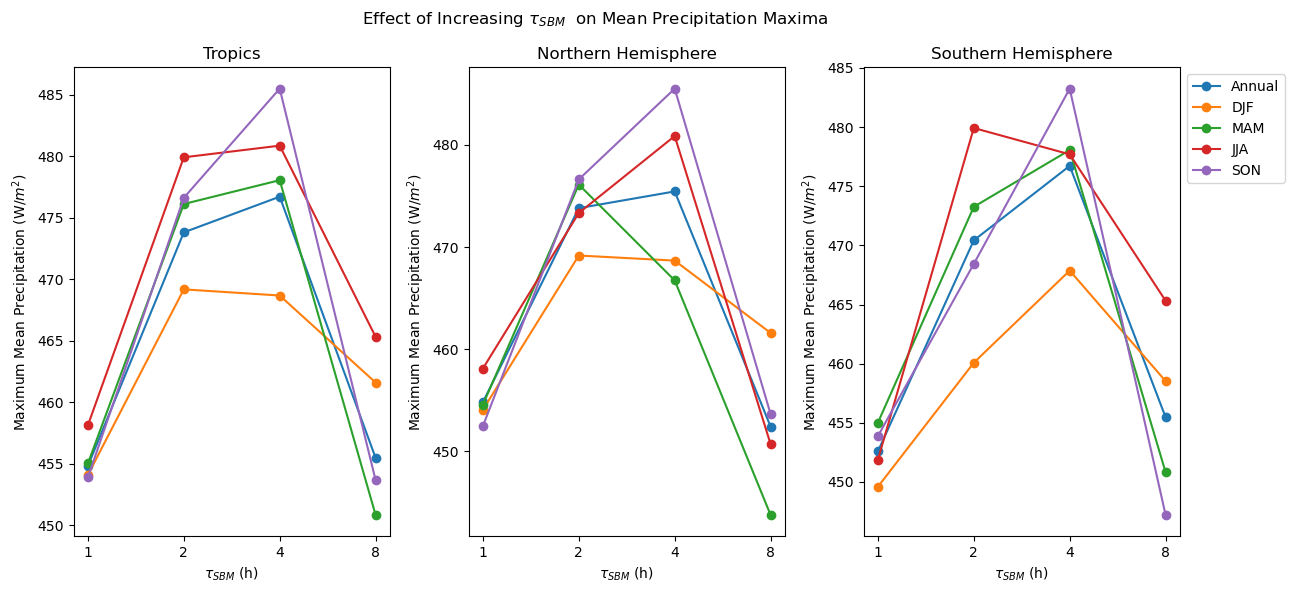

In [283]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
plotting_tausbm_vs_maxprecip_frierson(ax = ax[0], lmin = -30, lmax = 30) # max across tropics
ax[0].set_title('Tropics')
plotting_tausbm_vs_maxprecip_frierson(ax = ax[1], lmin = 0, lmax = 30) # NH Max
ax[1].set_title('Northern Hemisphere')
plotting_tausbm_vs_maxprecip_frierson(ax = ax[2], lmin = -30, lmax = 0) # SH Max
ax[2].set_title('Southern Hemisphere')
plt.suptitle('Effect of Increasing'+ r' $\tau_{SBM}$ ' +' on Mean Precipitation Maxima')
fig.tight_layout()
plt.legend(bbox_to_anchor = (1, 1))

## Earth Like Isca

Precipitation but filtered for specific season

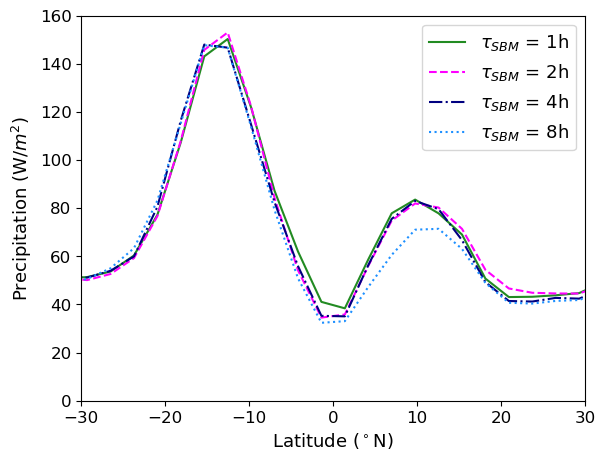

In [61]:
plt.figure(figsize = (6.5, 5))
precipitation_plot( [isca_vs_frierson_rh7_t1, isca_vs_frierson_rh7_t2, isca_vs_frierson_rh7_t4, isca_vs_frierson_rh7_t8], [r'$\tau_{SBM}$ = 1h', r'$\tau_{SBM}$ = 2h', r'$\tau_{SBM}$ = 4h', r'$\tau_{SBM}$ = 8h'], zoom = 30, exp = r'Earth-Like Isca ($RH_{SBM}$ = 0.7):', seasonal_avg=True, Season = 'DJF', styles = ['-', '--', '-.', ':'], colours = ['forestgreen', 'magenta', 'navy', 'dodgerblue'], ymin = 0, ymax = 160)
plt.title('')
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/EL_zonalprecip__tausbm.png')

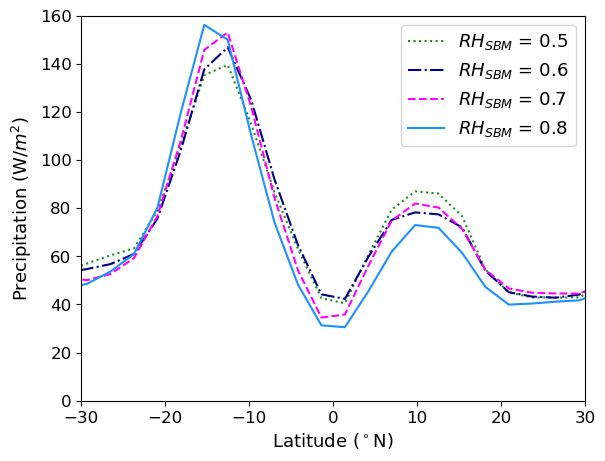

In [62]:
plt.figure(figsize = (6.5, 5))
precipitation_plot( [isca_vs_frierson_rh5_t2, isca_vs_frierson_rh6_t2, isca_vs_frierson_rh7_t2, isca_vs_frierson_rh8_t2], [r'$RH_{SBM}$ = 0.5', r'$RH_{SBM}$ = 0.6', r'$RH_{SBM}$ = 0.7', r'$RH_{SBM}$ = 0.8' ], zoom = 30, exp = r'Earth-Like Isca ($\tau_{SBM}$ = 2h):', seasonal_avg=True, Season = 'DJF', styles = [':', '-.', '--', '-'], colours = ['forestgreen', 'navy',  'magenta', 'dodgerblue'], ymin = 0, ymax = 160)
plt.title('')
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/EL_zonalprecip__rhsbm.png')

It would make sense to try to make the two which are the same the same colour across the two plots, by maybe defining an array of colours as an input to the function...

Seasonal Variability

/tmp/ipykernel_77841/400128014.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


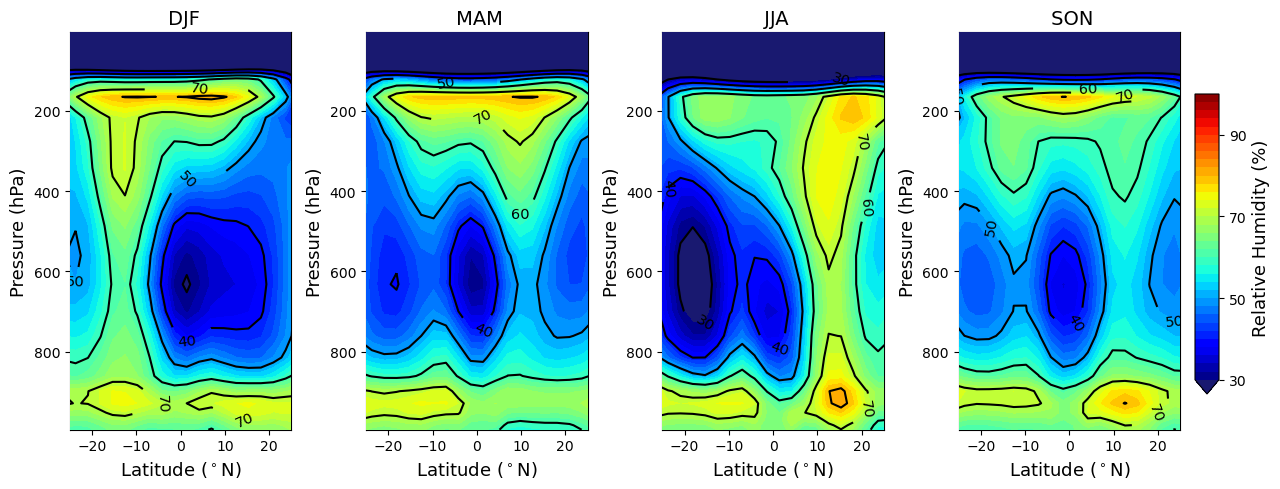

In [10]:
fig, axs = plt.subplots(ncols= 4, nrows = 1, figsize=(12, 5))

min = 30
L = np.arange(min, 101, 2) # filled contour levels
lines = [30, 40, 50, 60, 70, 80, 90] # contour line levels

seasons = ['DJF', 'MAM', 'JJA', 'SON']

for i in range(4):
    season = seasons[i]
    contours = zonal_mean_rh_plot_for_grid(isca_vs_frierson_rh7_t2,ax = axs[i], exp = '', levels = L, zoom=25, contour_levels = lines, seasonal_avg=True, Season = season);


#plt.suptitle(r'Earth-Like Isca ($RH_{SBM}$ = 0.7, $\tau_{SBM}$ = 2h):' + '\n Zonally and Seasonally Averaged Relative Humidity Humidity Distribution', fontsize=20)

colorbar(contours, 'Relative Humidity (%)', colorbar_ticks = np.arange(min, 101, 20))

fig.tight_layout()
#plt.savefig('/home/links/sr850/isca_results/my_results/Plots/EL_zonalrh_control_seaonalavg.png', bbox_inches='tight', pad_inches=0.1)

This one is comparison to Vallis 18.7 but could do with log scale to be exactly comparable

/tmp/ipykernel_287792/3630950615.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


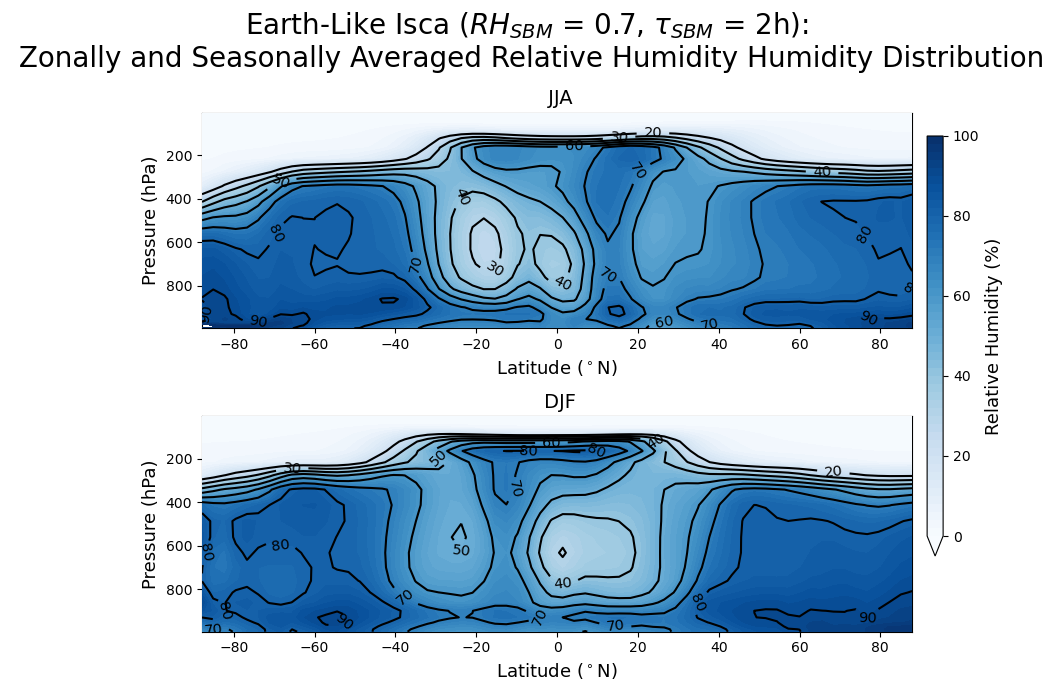

In [79]:
fig, axs = plt.subplots(ncols= 1, nrows = 2, figsize=(8, 7))

min = 0
L = np.arange(min, 101, 2) # filled contour levels
lines = [20, 30, 40, 50, 60, 70, 80, 90] # contour line levels

seasons = ['JJA', 'DJF']

for i in range(2):
    season = seasons[i]
    contours = zonal_mean_rh_plot_for_grid(isca_vs_frierson_rh7_t2,ax = axs[i], exp = '',cmap1='Blues', levels = L, zoom=0, contour_levels = lines, seasonal_avg=True, Season = season);

plt.suptitle(r'Earth-Like Isca ($RH_{SBM}$ = 0.7, $\tau_{SBM}$ = 2h):'+ '\n Zonally and Seasonally Averaged Relative Humidity Humidity Distribution', fontsize=20)

colorbar(contours, 'Relative Humidity (%)', colorbar_ticks = np.arange(min, 101, 20))

fig.tight_layout()

Varying the parameters seasonally - Need to pick a season though!

Winter

/tmp/ipykernel_241958/2406253649.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


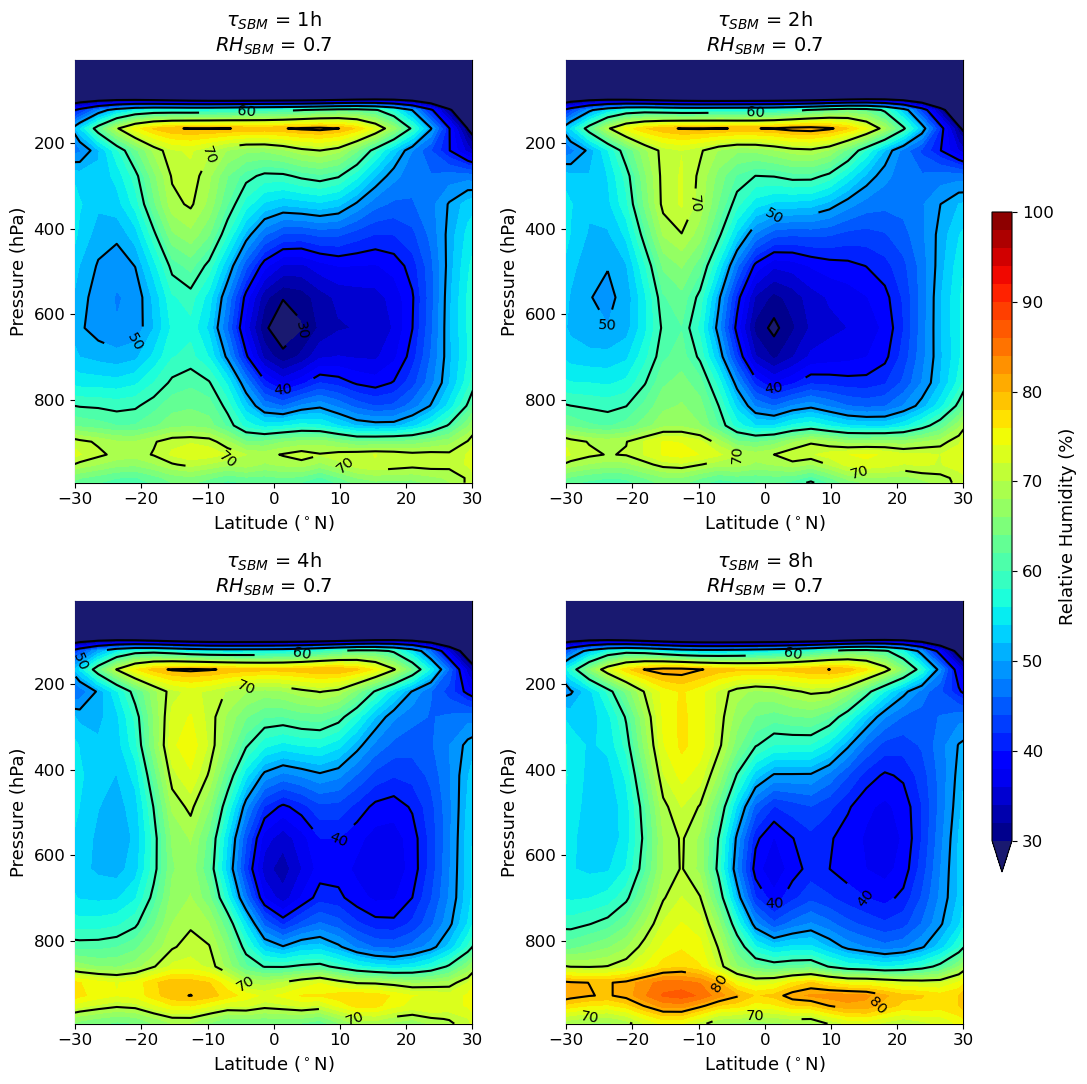

In [65]:
fig, axs = plt.subplots(ncols= 2, nrows = 2, figsize=(10, 11))

min = 30
L = np.arange(min, 101, 2) # filled contour levels
lines = [30, 40, 50, 60, 70, 80, 90] # contour line levels
Z = 30 # zoom

season = 'DJF'

contours = zonal_mean_rh_plot_for_grid(isca_vs_frierson_rh7_t1,ax = axs[0,0], exp = r'$\tau_{SBM}$ = 1h' +'\n' + r'$RH_{SBM}$ = 0.7' , levels = L, zoom=Z, contour_levels = lines, seasonal_avg=True, Season = season, sub_label_season = False);
zonal_mean_rh_plot_for_grid(isca_vs_frierson_rh7_t2,ax = axs[0,1], exp = r'$\tau_{SBM}$ = 2h' +'\n' + r'$RH_{SBM}$ = 0.7', levels = L, zoom=Z, contour_levels = lines, seasonal_avg=True, Season = season, sub_label_season = False);
zonal_mean_rh_plot_for_grid(isca_vs_frierson_rh7_t4,ax = axs[1,0], exp = r'$\tau_{SBM}$ = 4h' +'\n' + r'$RH_{SBM}$ = 0.7', levels = L, zoom=Z, contour_levels = lines, seasonal_avg=True, Season = season, sub_label_season = False);
zonal_mean_rh_plot_for_grid(isca_vs_frierson_rh7_t8,ax = axs[1, 1], exp = r'$\tau_{SBM}$ = 8h' +'\n' + r'$RH_{SBM}$ = 0.7', levels = L, zoom=Z, contour_levels = lines, seasonal_avg=True, Season = season, sub_label_season = False);

#plt.suptitle(f'Earth-Like Isca:\nZonally Averaged Relative Humidity Distribution ({season})', fontsize=20)

colorbar(contours, 'Relative Humidity (%)', colorbar_ticks = np.arange(min, 101, 10))
fig.tight_layout()
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/EL_zonalrh_DJF_tausbm.png', bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_241958/3845097777.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


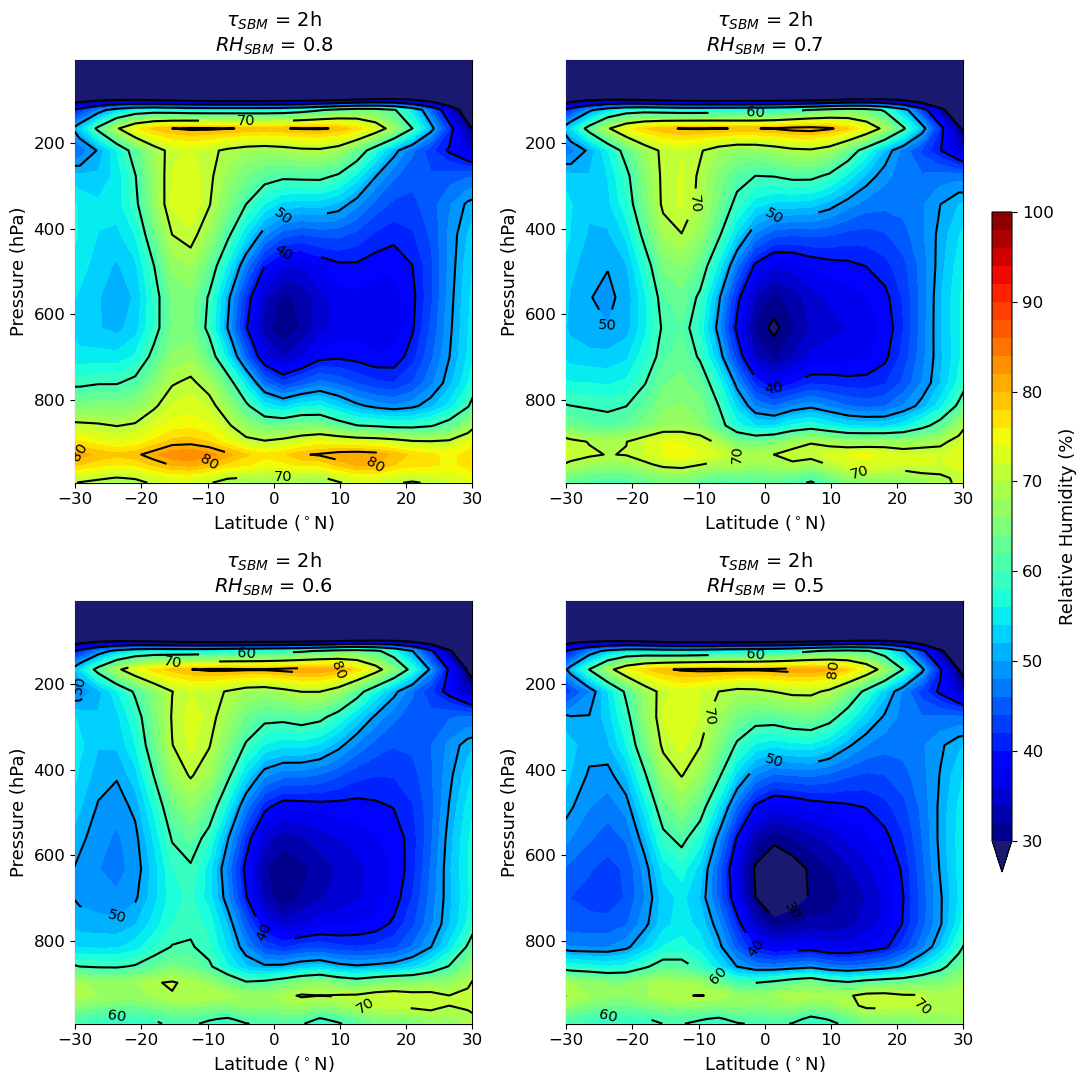

In [66]:
fig, axs = plt.subplots(ncols= 2, nrows = 2, figsize=(10, 11))

min = 30
L = np.arange(min, 101, 2) # filled contour levels
lines = [30, 40, 50, 60, 70, 80, 90] # contour line levels
Z = 30 # zoom

season = 'DJF'

contours = zonal_mean_rh_plot_for_grid(isca_vs_frierson_rh8_t2,ax = axs[0,0], exp = r'$\tau_{SBM}$ = 2h' +'\n' + r'$RH_{SBM}$ = 0.8' , levels = L, zoom=Z, contour_levels = lines, seasonal_avg=True, Season = season, sub_label_season = False);
zonal_mean_rh_plot_for_grid(isca_vs_frierson_rh7_t2,ax = axs[0,1], exp = r'$\tau_{SBM}$ = 2h' +'\n' + r'$RH_{SBM}$ = 0.7', levels = L, zoom=Z, contour_levels = lines, seasonal_avg=True, Season = season, sub_label_season = False);
zonal_mean_rh_plot_for_grid(isca_vs_frierson_rh6_t2,ax = axs[1,0], exp = r'$\tau_{SBM}$ = 2h' +'\n' + r'$RH_{SBM}$ = 0.6', levels = L, zoom=Z, contour_levels = lines, seasonal_avg=True, Season = season, sub_label_season = False);
zonal_mean_rh_plot_for_grid(isca_vs_frierson_rh5_t2,ax = axs[1, 1], exp = r'$\tau_{SBM}$ = 2h' +'\n' + r'$RH_{SBM}$ = 0.5', levels = L, zoom=Z, contour_levels = lines, seasonal_avg=True, Season = season, sub_label_season = False);

#plt.suptitle(f'Earth-Like Isca:\nZonally Averaged Relative Humidity Distribution ({season})', fontsize=20)

colorbar(contours, 'Relative Humidity (%)', colorbar_ticks = np.arange(min, 101, 10))
fig.tight_layout()

plt.savefig('/home/links/sr850/isca_results/my_results/Plots/EL_zonalrh_DJF_rhsbm.png', bbox_inches='tight', pad_inches=0.1)

## EL Isca Total Precip

In [67]:
#This is earth-like Isca
def plotting_rhsbm_vs_totalprecip(ax, lmin = -30, lmax = 30):
    rh_sbm = np.arange(0.5, 0.81, 0.1)
    t_precip = []

    t_precip_DJF = []
    t_precip_MAM = []
    t_precip_JJA = []
    t_precip_SON = []

    exps = ['rh5_t2', 'rh6_t2', 'rh7_t2', 'rh8_t2']
    datasets = [globals()[f'isca_vs_frierson_{e}'] for e in exps]


    for i in range(len(datasets)):
        ds = datasets[i]
        t_precip.append(cumulative_mean_precip(ds, seasonal_avg = False, latmin = lmin, latmax = lmax, Season = None))
        t_precip_DJF.append(cumulative_mean_precip(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'DJF'))
        t_precip_MAM.append(cumulative_mean_precip(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'MAM'))
        t_precip_JJA.append(cumulative_mean_precip(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'JJA'))
        t_precip_SON.append(cumulative_mean_precip(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'SON'))

    
    ax.plot(rh_sbm, t_precip, label = 'Annual', marker = 'o', color = 'navy')
    ax.plot(rh_sbm, t_precip_DJF, label = 'DJF', marker = 'o', color = 'cornflowerblue')
    ax.plot(rh_sbm, t_precip_MAM, label = 'MAM', marker = 'o', color = 'orchid')
    ax.plot(rh_sbm, t_precip_JJA, label = 'JJA', marker = 'o', color = 'green')
    ax.plot(rh_sbm, t_precip_SON, label = 'SON', marker = 'o', color = 'indianred')

    ax.set_ylabel('Total Mean Precipitation (W/$m^2$)')
    ax.set_xlabel('$RH_{SBM}$')
    ax.set_xticks(rh_sbm)
    #ax.set_ylim(50, 160)
    return fig

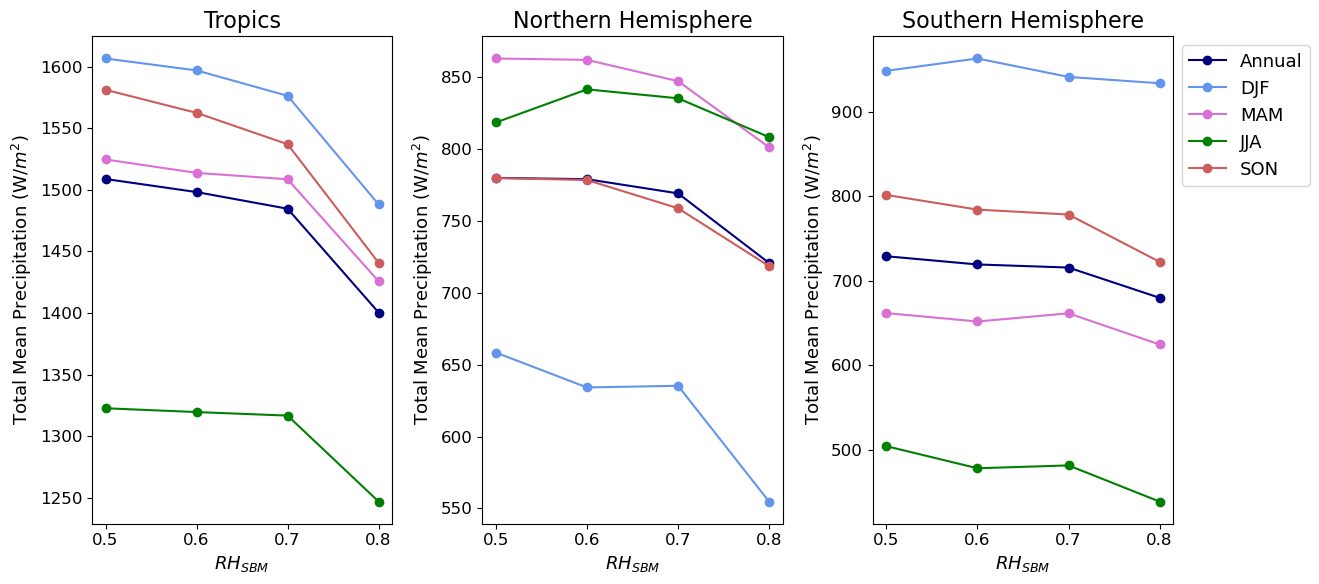

In [68]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
plotting_rhsbm_vs_totalprecip(ax = ax[0], lmin = -30, lmax = 30) # total mean precip across tropics
ax[0].set_title('Tropics')
plotting_rhsbm_vs_totalprecip(ax = ax[1], lmin = 0, lmax = 30) # NH Max
ax[1].set_title('Northern Hemisphere')
plotting_rhsbm_vs_totalprecip(ax = ax[2], lmin = -30, lmax = 0) # SH Max
ax[2].set_title('Southern Hemisphere')
#plt.suptitle('Effect of Increasing $RH_{SBM}$ on Total Mean Precipitation')
fig.tight_layout()
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/EL_totalprecip_rhsbm.png', bbox_inches='tight', pad_inches=0.1)

The mean precipitation in the tropics (Across the 4 years we're time averaging over) seems to decrease as rh_sbm is increased... so even though the precip maxima might increase, the total precip seems to decrease (but the dramatic decrease is only for rh_sbm = 0.8, otherwise changing rh_sbm doesn't seem to have a major impace on total precip in either hemisphere).

In [69]:
#This is earth-like Isca
def plotting_tausbm_vs_totalprecip(ax, lmin = -30, lmax = 30):
    tau_sbm = ['1', '2', '4', '8']
    exps = ['rh7_t1', 'rh7_t2', 'rh7_t4', 'rh7_t8']
    datasets = [globals()[f'frierson_{e}'] for e in exps]
    
    t_precip = []

    t_precip_DJF = []
    t_precip_MAM = []
    t_precip_JJA = []
    t_precip_SON = []


    for i in range(len(datasets)):
        ds = datasets[i]
        t_precip.append(cumulative_mean_precip(ds, seasonal_avg = False, latmin = lmin, latmax = lmax, Season = None))
        t_precip_DJF.append(cumulative_mean_precip(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'DJF'))
        t_precip_MAM.append(cumulative_mean_precip(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'MAM'))
        t_precip_JJA.append(cumulative_mean_precip(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'JJA'))
        t_precip_SON.append(cumulative_mean_precip(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'SON'))

    
    ax.plot(tau_sbm, t_precip, label = 'Annual', marker = 'o', color = 'navy')
    ax.plot(tau_sbm, t_precip_DJF, label = 'DJF', marker = 'o', color = 'cornflowerblue')
    ax.plot(tau_sbm, t_precip_MAM, label = 'MAM', marker = 'o', color = 'orchid')
    ax.plot(tau_sbm, t_precip_JJA, label = 'JJA', marker = 'o', color = 'green')
    ax.plot(tau_sbm, t_precip_SON, label = 'SON', marker = 'o', color = 'indianred')

    ax.set_ylabel('Total Mean Precipitation (W/$m^2$)')
    ax.set_xlabel(r'$\tau_{SBM}$')
    ax.set_xticks(tau_sbm)
    #ax.set_ylim(50, 160)
    return fig

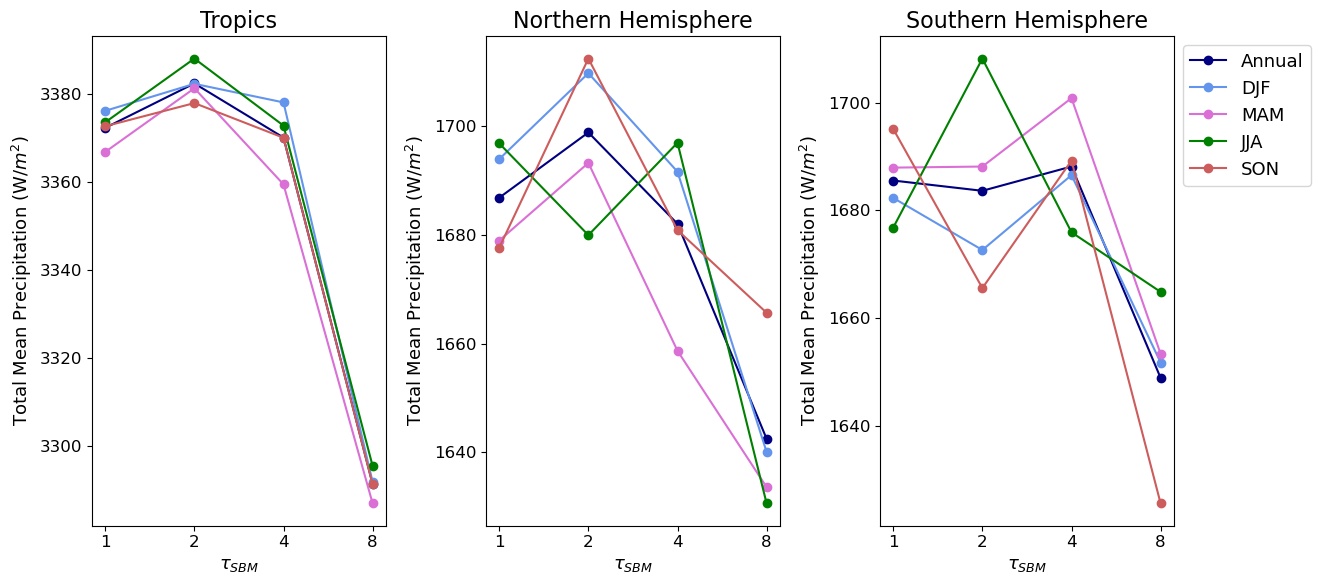

In [70]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
plotting_tausbm_vs_totalprecip(ax = ax[0], lmin = -30, lmax = 30) # total mean precip across tropics
ax[0].set_title('Tropics')
plotting_tausbm_vs_totalprecip(ax = ax[1], lmin = 0, lmax = 30) # NH Max
ax[1].set_title('Northern Hemisphere')
plotting_tausbm_vs_totalprecip(ax = ax[2], lmin = -30, lmax = 0) # SH Max
ax[2].set_title('Southern Hemisphere')
#plt.suptitle(r'Effect of Increasing $\tau_{SBM}$ on Total Mean Precipitation')
fig.tight_layout()
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/EL_totalprecip_tausbm.png', bbox_inches='tight', pad_inches=0.1)

In [71]:
exps = ['rh5_t2', 'rh6_t2', 'rh7_t2', 'rh8_t2', 'rh7_t1', 'rh7_t2', 'rh7_t4', 'rh7_t8']
datasets = [globals()[f'isca_vs_frierson_{e}'] for e in exps]
S = 'JJA' #Season
for i in range(len(datasets)):
    ds = datasets[i]
    exp = exps[i]

    print(f'annual_max_precip_tropics {exp} = ', precipitation_max(ds, seasonal_avg = False, latmin = -30, latmax = 30, Season = None))
    print(f'annual_max_precip_NH_tropics {S} {exp} = ', precipitation_max(ds, seasonal_avg = False, latmin = 0))
    print(f'annual_max_precip_SH_tropics {S} {exp} = ', precipitation_max(ds, seasonal_avg = False, latmin = -30, latmax = 0))

    print(f'max_precip_tropics {S} {exp} = ', precipitation_max(ds, seasonal_avg = True, Season = S))
    print(f'max_precip_NH_tropics {S} {exp} = ', precipitation_max(ds, seasonal_avg = True, latmin = 0, Season = S))
    print(f'max_precip_SH_tropics {S} {exp} = ', precipitation_max(ds, seasonal_avg = True, latmin = -30, latmax = 0, Season = S))

annual_max_precip_tropics rh5_t2 =  104.03833
annual_max_precip_NH_tropics JJA rh5_t2 =  104.03833
annual_max_precip_SH_tropics JJA rh5_t2 =  94.88589
max_precip_tropics JJA rh5_t2 =  114.41525
max_precip_NH_tropics JJA rh5_t2 =  114.41525
max_precip_SH_tropics JJA rh5_t2 =  65.68665
annual_max_precip_tropics rh6_t2 =  104.24632
annual_max_precip_NH_tropics JJA rh6_t2 =  104.24632
annual_max_precip_SH_tropics JJA rh6_t2 =  97.12097
max_precip_tropics JJA rh6_t2 =  118.27865
max_precip_NH_tropics JJA rh6_t2 =  118.27865
max_precip_SH_tropics JJA rh6_t2 =  59.931564
annual_max_precip_tropics rh7_t2 =  107.595924
annual_max_precip_NH_tropics JJA rh7_t2 =  107.595924
annual_max_precip_SH_tropics JJA rh7_t2 =  100.6045
max_precip_tropics JJA rh7_t2 =  129.18109
max_precip_NH_tropics JJA rh7_t2 =  129.18109
max_precip_SH_tropics JJA rh7_t2 =  67.3484
annual_max_precip_tropics rh8_t2 =  109.70324
annual_max_precip_NH_tropics JJA rh8_t2 =  109.70324
annual_max_precip_SH_tropics JJA rh8_t2 =  9

## EL Isca Max Precip

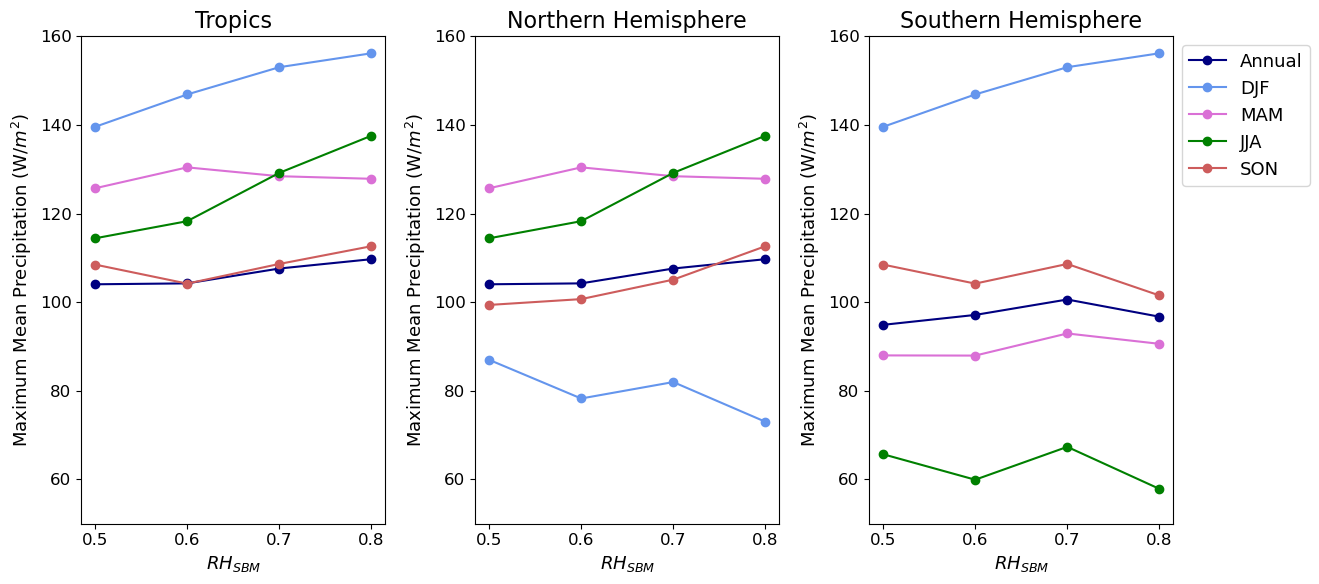

In [72]:
def plotting_rhsbm_vs_maxprecip(ax, lmin = -30, lmax = 30):
    rh_sbm = np.arange(0.5, 0.81, 0.1)
    max_precip = []

    max_precip_DJF = []
    max_precip_MAM = []
    max_precip_JJA = []
    max_precip_SON = []

    exps = ['rh5_t2', 'rh6_t2', 'rh7_t2', 'rh8_t2']
    datasets = [globals()[f'isca_vs_frierson_{e}'] for e in exps]


    for i in range(len(datasets)):
        ds = datasets[i]
        max_precip.append(precipitation_max(ds, seasonal_avg = False, latmin = lmin, latmax = lmax, Season = None))
        max_precip_DJF.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'DJF'))
        max_precip_MAM.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'MAM'))
        max_precip_JJA.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'JJA'))
        max_precip_SON.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'SON'))

    
    ax.plot(rh_sbm, max_precip, label = 'Annual', marker = 'o', color = 'navy')
    ax.plot(rh_sbm, max_precip_DJF, label = 'DJF', marker = 'o', color = 'cornflowerblue')
    ax.plot(rh_sbm, max_precip_MAM, label = 'MAM', marker = 'o', color = 'orchid')
    ax.plot(rh_sbm, max_precip_JJA, label = 'JJA', marker = 'o', color = 'green')
    ax.plot(rh_sbm, max_precip_SON, label = 'SON', marker = 'o', color = 'indianred')

    ax.set_ylabel('Maximum Mean Precipitation (W/$m^2$)')
    ax.set_xlabel('$RH_{SBM}$')
    ax.set_xticks(rh_sbm)
    ax.set_ylim(50, 160)
    return fig

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
plotting_rhsbm_vs_maxprecip(ax = ax[0], lmin = -30, lmax = 30) # max across tropics
ax[0].set_title('Tropics')
plotting_rhsbm_vs_maxprecip(ax = ax[1], lmin = 0, lmax = 30) # NH Max
ax[1].set_title('Northern Hemisphere')
plotting_rhsbm_vs_maxprecip(ax = ax[2], lmin = -30, lmax = 0) # SH Max
ax[2].set_title('Southern Hemisphere')
#plt.suptitle('Effect of Increasing $RH_{SBM}$ on Mean Precipitation Maxima')
fig.tight_layout()
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/EL_maxprecip_rhsbm.png', bbox_inches='tight', pad_inches=0.1)

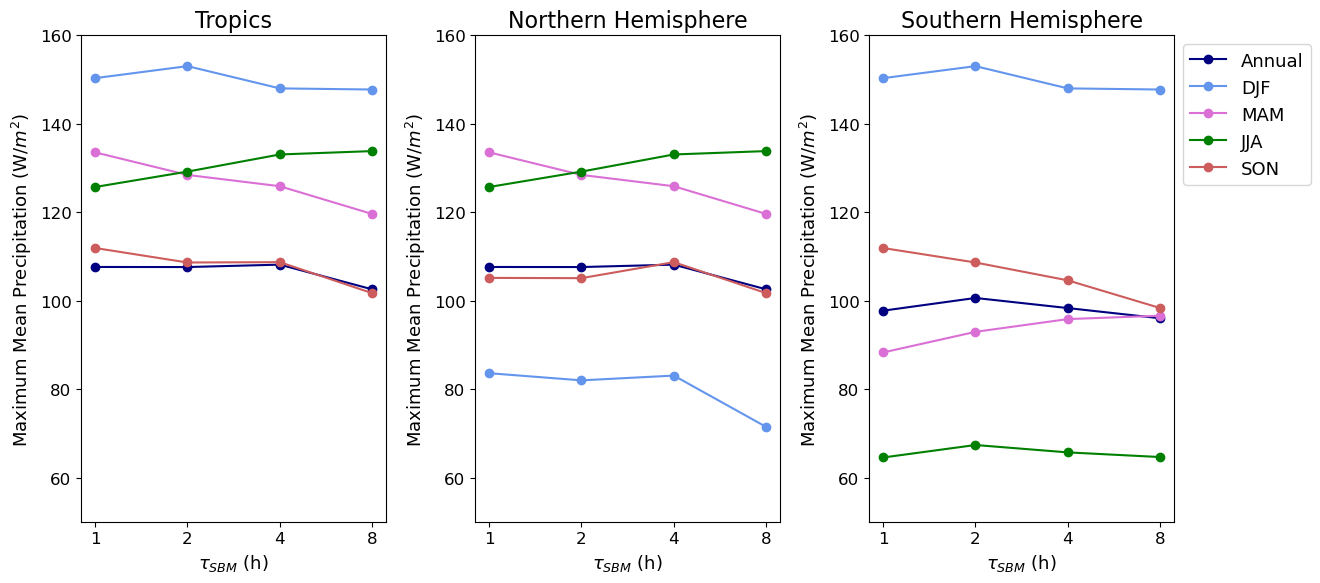

In [73]:
def plotting_tausbm_vs_maxprecip(ax, lmin = -30, lmax = 30):
    tau_sbm = ['1', '2', '4', '8']
    max_precip = []

    max_precip_DJF = []
    max_precip_MAM = []
    max_precip_JJA = []
    max_precip_SON = []

    exps = ['rh7_t1', 'rh7_t2', 'rh7_t4', 'rh7_t8']
    datasets = [globals()[f'isca_vs_frierson_{e}'] for e in exps]


    for i in range(len(datasets)):
        ds = datasets[i]
        max_precip.append(precipitation_max(ds, seasonal_avg = False, latmin = lmin, latmax = lmax, Season = None))
        max_precip_DJF.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'DJF'))
        max_precip_MAM.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'MAM'))
        max_precip_JJA.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'JJA'))
        max_precip_SON.append(precipitation_max(ds, seasonal_avg = True, latmin = lmin, latmax = lmax, Season = 'SON'))

    
    ax.plot(tau_sbm, max_precip, label = 'Annual', marker = 'o', color = 'navy')
    ax.plot(tau_sbm, max_precip_DJF, label = 'DJF', marker = 'o', color = 'cornflowerblue')
    ax.plot(tau_sbm, max_precip_MAM, label = 'MAM', marker = 'o', color = 'orchid')
    ax.plot(tau_sbm, max_precip_JJA, label = 'JJA', marker = 'o', color = 'green')
    ax.plot(tau_sbm, max_precip_SON, label = 'SON', marker = 'o', color = 'indianred')

    ax.set_ylabel('Maximum Mean Precipitation (W/$m^2$)')
    ax.set_xlabel(r'$\tau_{SBM}$ (h)')
    ax.set_xticks(tau_sbm)
    ax.set_ylim(50, 160)
    return fig

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
plotting_tausbm_vs_maxprecip(ax = ax[0], lmin = -30, lmax = 30) # max across tropics
ax[0].set_title('Tropics')
plotting_tausbm_vs_maxprecip(ax = ax[1], lmin = 0, lmax = 30) # NH Max
ax[1].set_title('Northern Hemisphere')
plotting_tausbm_vs_maxprecip(ax = ax[2], lmin = -30, lmax = 0) # SH Max
ax[2].set_title('Southern Hemisphere')
#plt.suptitle('Effect of Increasing'+ r' $\tau_{SBM}$ ' +' on Mean Precipitation Maxima')
fig.tight_layout()
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/EL_maxprecip_tausbm.png', bbox_inches='tight', pad_inches=0.1)

In [74]:
frierson_rh7_t1.sel

<xarray.Dataset>
Dimensions:        (lon: 128, lonb: 129, lat: 64, latb: 65, time: 48, nv: 2,
                    phalf: 26, pfull: 25)
Coordinates:
  * lon            (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lonb           (lonb) float64 -1.406 1.406 4.219 7.031 ... 353.0 355.8 358.6
  * lat            (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * latb           (latb) float64 -90.0 -86.58 -83.76 ... 83.76 86.58 90.0
  * time           (time) object 0002-01-16 00:00:00 ... 0005-12-16 00:00:00
  * nv             (nv) float64 1.0 2.0
  * phalf          (phalf) float64 0.0 11.77 19.67 31.52 ... 977.8 989.7 1e+03
  * pfull          (pfull) float64 4.329 15.55 25.36 39.73 ... 970.2 983.8 994.9
Data variables: (12/17)
    ps             (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
    bk             (time, phalf) float32 dask.array<chunksize=(1, 26), meta=np.ndarray>
    pk             (time, phalf) float32 dask.array<chunksize=(1, 26), meta=np.ndarray>
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
    t_surf         (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
    sphum          (time, pfull, lat, lon) float32 dask.array<chunksize=(1, 25, 64, 128), meta=np.ndarray>
    ...             ...
    rh             (time, pfull, lat, lon) float32 dask.array<chunksize=(1, 25, 64, 128), meta=np.ndarray>
    rh_2m          (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
    average_T1     (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2     (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT     (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds    (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   /home/links/sr850/isca_work/experiment/frierson_test_case_rh7...
    title:      FMS Model results
    grid_type:  regular
    grid_tile:  N/A

In [11]:
base_dir = '/home/links/sr850/isca_data/'
# Data from Frierson Test Case
exp_name = 'frierson_test_case_rh7_tau2_new'
frierson_rh7_t2_new_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_monthly.nc' for file_idx in range(1,8)]
frierson_rh7_t2_new = xr.open_mfdataset(frierson_rh7_t2_new_files, use_cftime=True)

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_77841/2620699013.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('Latitude ($^\circ$ N)')


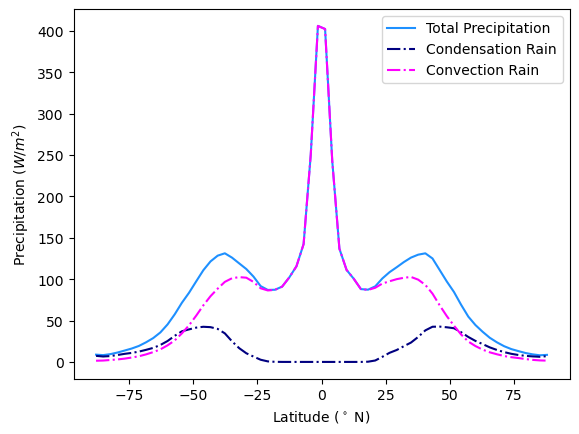

In [33]:
ds = frierson_rh7_t2_new.mean(dim = ['time', 'lon'])
(ds.precipitation*2.26e6).plot(label = 'Total Precipitation', color = 'dodgerblue')
(ds.condensation_rain*2.26e6).plot(label = 'Condensation Rain', color = 'navy' , linestyle = '-.')
(ds.convection_rain*2.26e6).plot(label = 'Convection Rain', color='magenta', linestyle = '-.')
plt.legend()
plt.ylabel('Precipitation ($W/m^2$)')
plt.xlabel('Latitude ($^\circ$ N)')
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/FTC_rh7t2_convec_vs_condens_rain.png', bbox_inches='tight', pad_inches=0.1)

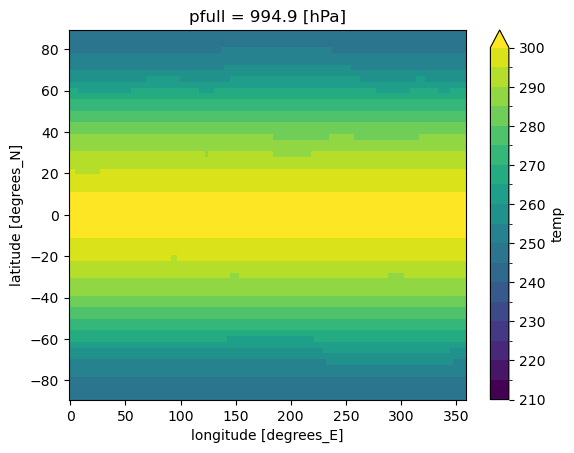

In [56]:
frierson_rh7_t2.sel(pfull = 1000, method = 'nearest').temp.mean('time').plot(levels = np.arange(210, 305, 5))

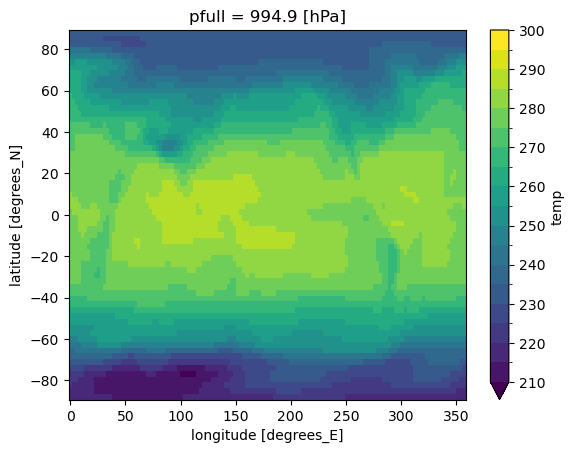

In [54]:
isca_vs_frierson_rh7_t2.sel(pfull = 1000, method = 'nearest').temp.mean('time').plot(levels = np.arange(210, 305, 5))

In [62]:
frierson_rh7_t2.sel(pfull = 1000, method = 'nearest').temp.values.mean()

276.8798